# Predicting the sale price of bulldozers using machine learning 
 - ## problem defination
 - ## data
    there are 3 data sets-
       - train.csv = training data
       - valid.csv = validate data
       - test.csv = test.data
 - ## evaluation
    the evaluation metric for the given dataset will be based on root mean squared log error between the actual and predicted prices

     So the goal of this project will be to minimize the RSMLE 
 - ## features
   data dictionary = https://docs.google.com/spreadsheets/d/1UQLOLprnICof1aLTHbz6lpurVwqEF2ReRzhyV5j4i58/edit?gid=542815706#gid=542815706

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn



In [91]:
#Importing training and validating data
df = pd.read_csv("data/TrainAndValid.csv", low_memory= False)


In [92]:
#Exploring the data

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [94]:
#checking for null values

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [95]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [96]:
#visualizing the data of let's say salesdate and SalePrice

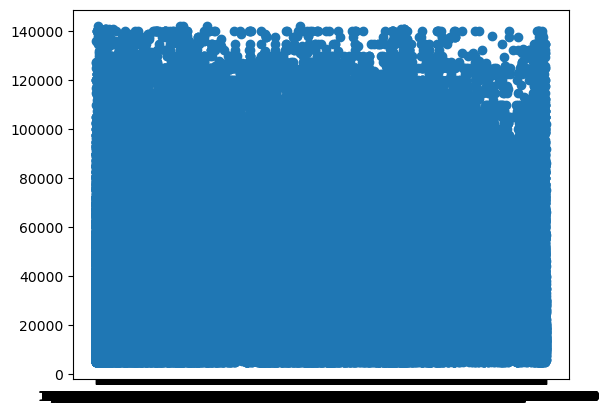

In [97]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"], df["SalePrice"])
plt.show();

need to take small part of data

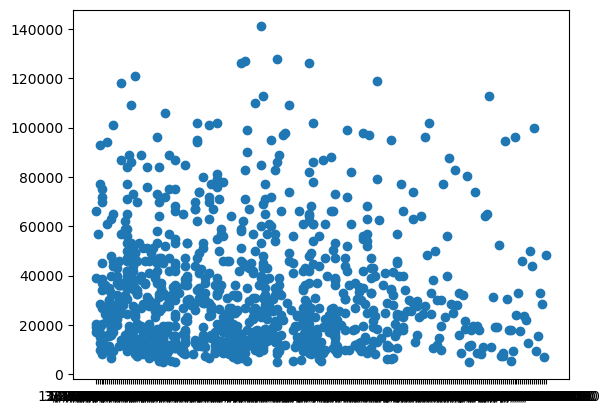

In [98]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show();

<Axes: ylabel='Frequency'>

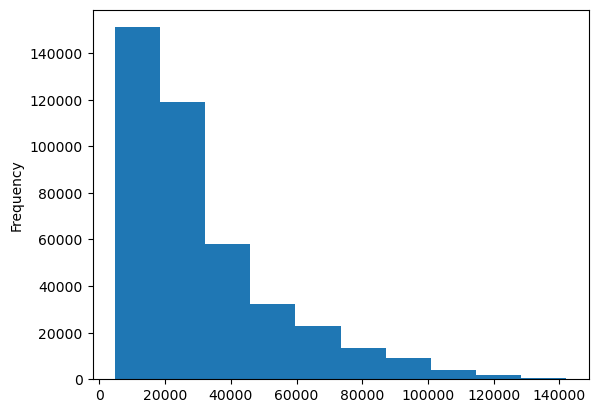

In [99]:
df.SalePrice.plot.hist()

In [100]:
#Parsing the date data
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

will have to convert into numerical form 



In [101]:
## Using data parsing 
##overriding the df 
df = pd.read_csv("data/TrainAndValid.csv", low_memory= False, parse_dates = ["saledate"])

In [102]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

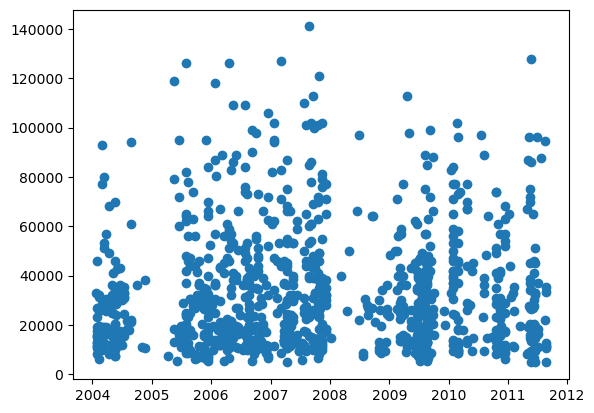

In [103]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [104]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#sorting the df by saledate

df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [106]:
df_temp = df.copy()

## Adding date time parameters to sale date 



In [107]:
df_temp ["salesYear"] = df_temp.saledate.dt.year
df_temp["salesDate"]= df_temp.saledate.dt.date
df_temp["salesMonth"]=df_temp.saledate.dt.month
df_temp["salesDayOfWeek"]=df_temp.saledate.dt.dayofweek
df_temp["salesDayOfYear"]=df_temp.saledate.dt.dayofyear

In [108]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [66]:
#now we dont need saledate
df_temp.drop("saledate", axis = 1, inplace = True)

In [67]:
len(df_temp)

412698

## Modelling

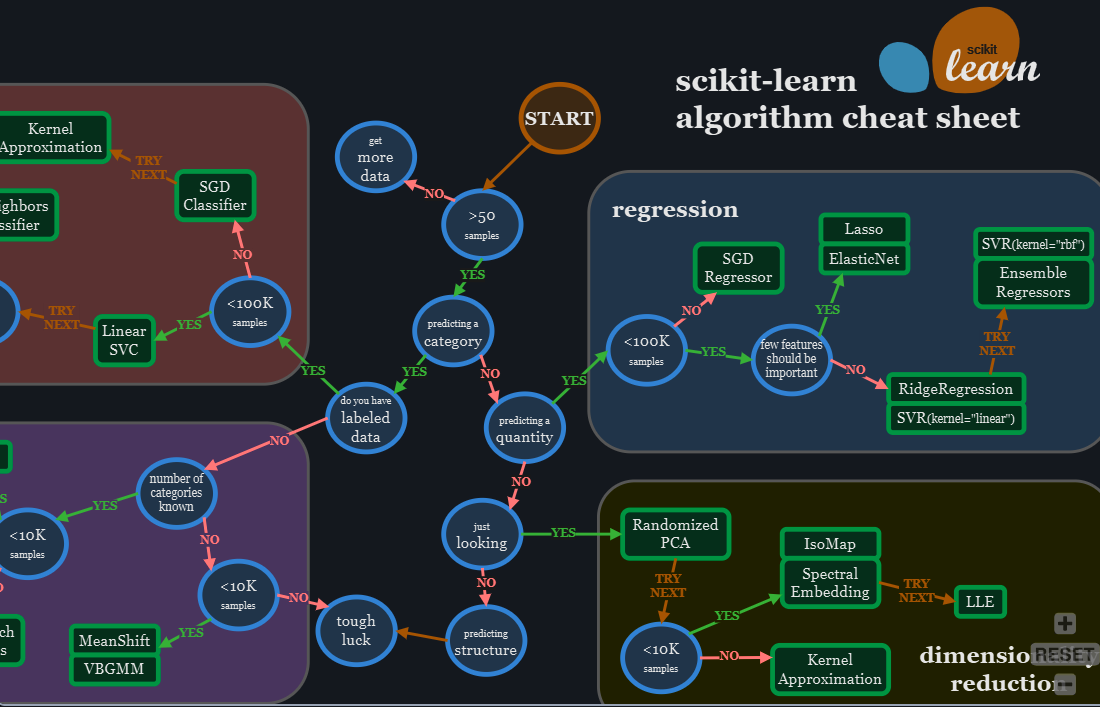

by sheet we will have perform regression on the taken data set

In [88]:
"""np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state = 42)
model.fit(df_temp.drop("SalePrice", axis =1), df_temp["SalePrice"])"""

'np.random.seed(42)\nfrom sklearn.ensemble import RandomForestRegressor\nmodel = RandomForestRegressor(n_jobs=-1, random_state = 42)\nmodel.fit(df_temp.drop("SalePrice", axis =1), df_temp["SalePrice"])'

have to convert everything to numeric

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [74]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

missing data

In [75]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [87]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [109]:
#finding columns with strings 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


## string values to category 

In [122]:

for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [123]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   saledate                  412698 non-null  category
 10  fiModelDesc               412698 non-null  category
 11  fiBaseModel               412698 non-null  category
 12  fiSecondaryDesc           271971 non-null  object  
 13  fiModelSeries             586

In [116]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [117]:
df_temp.state.cat.codes


205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Converted to numerical data by pandas
now missing data work 

In [118]:
df_temp.isnull().sum() / len(df_temp)#to get in percentage

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [119]:
df_temp.to_csv("train_temp.csv", index =False)

In [124]:
df_temp = pd.read_csv("train_temp.csv", low_memory = False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31


## filling the missing values
### filling numeric first

In [125]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
salesYear
salesMonth
salesDayOfWeek
salesDayOfYear


In [126]:
#checking for the null values 
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print (label)

auctioneerID
MachineHoursCurrentMeter


these 2 columns have missing values 

In [137]:
#filling them with the median 

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"_is_missing"]=pd.isnull(content)# binary column will be created 
            df_temp[label] = content.fillna(content.median())

In [140]:
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
saledate                                   0
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks     

## filling and turning categorical variables into numbers

In [141]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
salesDate


these are the categorical features

In [142]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column to indicate whether the columns has missing value or not
        df_temp[label+"_is_missing"]= pd.isnull(content)
        df_temp[label]= pd.Categorical(content).codes+1# did plus taki agar missing hua toh machine will make it -1

In [143]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 106 entries, SalesID to salesDate_is_missing
dtypes: bool(48), float64(3), int16(6), int64(9), int8(40)
memory usage: 77.1 MB


In [147]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
salesDate_is_missing            0
Length: 106, dtype: int64

## Modelling

In [149]:
%%time 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                             random_state = 42)
X= df_temp.drop("SalePrice", axis = 1)
y = df_temp["SalePrice"]
model.fit (X,y) 

CPU times: total: 29min 48s
Wall time: 7min 42s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
model.score(X,y)

0.9878880496960653

by default score()-> R^2 (coefficient of determination)

good score but not reliable as we are scoring on the same data as same as training data 

In [157]:
#splitting train and validate data set 
# given that train data is till 2011 and validation data is from start to end of 2012
df_temp.salesYear.value_counts()

salesYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

validation set = 2012 - 11573

In [158]:
#splitting 
df_validation = df_temp[df_temp==2012]
df_train = df_temp[df_temp!= 2012]
len(df_validation), len(df_train)

(412698, 412698)

In [159]:
#split into X and y 
X_train = df_temp.drop("SalePrice", axis = 1)
y_train = df_temp["SalePrice"]

In [160]:
X_valid = df_temp.drop("SalePrice", axis = 1)
y_valid = df_temp["SalePrice"]


In [164]:
X_train.shape,y_train.shape,X_valid.shape,y_valid. shape

((412698, 105), (412698,), (412698, 105), (412698,))

In [178]:
#creating evaluation function to create RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rsmle(y_test, y_preds):
    """calculate root mean squared error between true labels and prediction"""
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def showscore(model):
    train_preds= model.predict(X_train)
    valid_preds= model.predict(X_valid)
    score = {"Training MAE": mean_absolute_error(y_train, train_preds),
            " Validation MAE": mean_absolute_error(y_valid, valid_preds),
            "Training RMSLE": rsmle(y_train, train_preds),
            "Validation RMSLE": rsmle(y_valid, valid_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Validating R^2": r2_score(y_valid, valid_preds)}
    return score

## Testing the model for further tunning

In [170]:
#model = RandomForestRegressor(n_job = -1, random_state=42)
#model.fit(X_train, y_train)

now this would take huge time so we use a subset of the data 

In [176]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples = 10000) # now the data is trained on only 10k sample to reduce time 
#but it will surely give not as good scores
model.fit(X_train, y_train)

CPU times: total: 1min
Wall time: 16.6 s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


see the time reduced 

In [179]:
showscore(model)

{'Training MAE': 5470.956649123573,
 ' Validation MAE': 5470.956649123573,
 'Training RMSLE': np.float64(0.2545903919462464),
 'Validation RMSLE': np.float64(0.2545903919462464),
 'Training R^2': 0.865545510974422,
 'Validating R^2': 0.865545510974422}

### Tunning of hyperparameter by randomizedsearchcv 

In [207]:
%%time

from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators": np.arange(10,100,10),
        "max_depth":[None, 3, 5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt", None],
        "max_samples": [10000]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                        param_distributions= rf_grid,
                        n_iter = 2,
                        cv = 5,
                        verbose=True)

CPU times: total: 0 ns
Wall time: 103 μs


In [208]:
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,2
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [211]:
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(11),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [212]:
showscore(rs_model)

{'Training MAE': 8201.357024594634,
 ' Validation MAE': 8201.357024594634,
 'Training RMSLE': np.float64(0.3625249659821448),
 'Validation RMSLE': np.float64(0.3625249659821448),
 'Training R^2': 0.724077518182687,
 'Validating R^2': 0.724077518182687}

### now we will be getting ideal model

using 100 iterations 


In [332]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) 

# Fit the ideal model
ideal_model.fit(X_train, y_train)

,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [333]:
showscore(ideal_model)

{'Training MAE': 2870.184304957748,
 ' Validation MAE': 2870.184304957748,
 'Training RMSLE': np.float64(0.1411931513344234),
 'Validation RMSLE': np.float64(0.1411931513344234),
 'Training R^2': 0.9613553574305367,
 'Validating R^2': 0.9613553574305367}

## Ideal model score of RMSLE= 0.141

In [360]:
df_test = pd.read_csv("data/Test.csv", low_memory = False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


this does not have the price columnn so will pass entire df to be predict


In [361]:
#y_preds = ideal_model.predict(df_test)

In [362]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

bring it in the same format - preprocessing 

In [363]:
def preprocess_data(df):
    """same thing to do which was done in the train data set"""
    df ["salesYear"] = df.saledate.dt.year
    df["salesDate"]= df.saledate.dt.date
    df["salesMonth"]=df.saledate.dt.month
    df["salesDayOfWeek"]=df.saledate.dt.dayofweek
    df["salesDayOfYear"]=df.saledate.dt.dayofyear
    df.drop("saledate", axis =1, inplace = True )
    #fill numeric rows with median 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"]=pd.isnull(content)# binary column will be created 
                df[label] = content.fillna(content.median())
        # fill categorical data and turn them into categorical numbers 
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    return df

In [364]:
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,salesDate_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [365]:
#y_preds = ideal_model.predict(df_test)

In [366]:
set(X_train.columns)-set(df_test.columns)

{'MachineHoursCurrentMeteris_missing',
 'auctioneerIDis_missing',
 'saledate',
 'saledate_is_missing'}

In [367]:
X_train.shape

(412698, 105)

In [368]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,salesDate_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,True,True,True,True,False,False,False,True,True,False
1,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1820,...,True,True,True,True,True,True,True,False,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2348,...,True,True,True,True,False,False,False,True,True,False
3,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1819,...,True,True,True,True,True,True,True,False,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2119,...,True,True,True,True,False,False,False,True,True,False


In [369]:
X_train.MachineHoursCurrentMeter.value_counts()

MachineHoursCurrentMeter
0.0        339028
2000.0        124
1000.0        117
24.0          115
1500.0        101
            ...  
18622.0         1
14491.0         1
13956.0         1
10166.0         1
16382.0         1
Name: count, Length: 15633, dtype: int64

In [370]:
#df_test["MachineHoursCurrentMeter"]=0.0
df_test["auctioneerID"]= False
#df_test["saledate_is_missing"]= False


In [373]:
df_test = df_test.reindex(columns=ideal_model.feature_names_in_, fill_value=0)
test_preds = ideal_model.predict(df_test)


In [374]:
test_preds

array([30005.09637666, 21846.05015501, 83161.69585645, ...,
       19278.53409401, 26434.07348612, 30024.17033186], shape=(12457,))

In [375]:
#the test_preds is not in the from as kaggle asked 


In [377]:
df_preds = pd.DataFrame()

In [378]:
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds

,SalesID,SalesPrice
0,1227829,30005.096377
1,1227844,21846.050155
2,1227847,83161.695856
3,1227848,82764.173674
4,1227863,63728.325561
...,...,...
12452,6643171,51455.347916
12453,6643173,21333.235388
12454,6643184,19278.534094
12455,6643186,26434.073486


In [380]:
#export prediction data
df_preds.to_csv("data/test_prediction_final.csv", index = False)

### Feature importance 

In [384]:
ideal_model.feature_importances_

array([2.56038228e-02, 1.55134972e-02, 4.06980425e-02, 7.23678375e-04,
       2.80084429e-03, 2.09724310e-01, 2.61440147e-03, 9.67453617e-04,
       4.11006891e-02, 4.33992877e-02, 4.73834953e-02, 6.57504191e-02,
       4.39585632e-03, 2.13334624e-02, 1.41824051e-01, 4.44534516e-02,
       5.24326057e-03, 2.42748619e-03, 2.89266807e-03, 2.88500542e-03,
       6.23906548e-02, 8.17919109e-04, 3.44134815e-05, 1.81825204e-03,
       1.70625193e-04, 8.06870836e-04, 1.97827771e-05, 5.68196502e-05,
       1.05069132e-02, 1.49304900e-03, 2.14101333e-03, 2.17166523e-03,
       3.75957242e-03, 2.73114793e-03, 1.70332090e-03, 7.46735219e-04,
       1.07717865e-02, 7.52284476e-04, 1.31806308e-02, 3.13028237e-03,
       1.57356484e-03, 9.43652455e-04, 8.00163264e-04, 1.54286270e-03,
       5.75396624e-04, 7.30509572e-04, 3.10771666e-04, 3.44663147e-04,
       1.98372398e-03, 1.42962326e-03, 2.73892121e-04, 4.74172059e-04,
       1.16461852e-02, 3.92691424e-02, 2.37311417e-03, 2.46456972e-03,
      

In [385]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,salesDate_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,True,True,True,True,False,False,False,True,True,False
1,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1820,...,True,True,True,True,True,True,True,False,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2348,...,True,True,True,True,False,False,False,True,True,False
3,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1819,...,True,True,True,True,True,True,True,False,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2119,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,1915521,5266,149,99.0,2001,0.0,0,4013,2101,...,True,True,True,True,False,False,False,True,True,False
412694,6324811,1919104,19330,149,99.0,2004,0.0,0,4013,240,...,True,True,True,True,True,True,True,True,True,False
412695,6313029,1918416,17244,149,99.0,2004,0.0,0,4013,627,...,True,True,True,True,True,True,True,True,True,False
412696,6266251,509560,3357,149,99.0,1993,0.0,0,4013,83,...,True,True,True,True,True,True,True,True,True,False


In [392]:
#helper function to plot feature importance

def feature_plot(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importance": importances}).sort_values("feature_importance", ascending= False)).reset_index(drop=True)
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:20])
    ax.set_ylabel = ("Features")
    ax.set_xlabel= ("Feature Importance")
    ax.invert_yaxis()

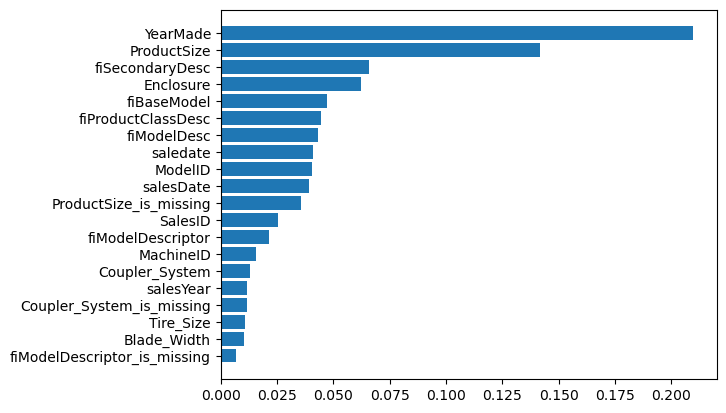

In [393]:
feature_plot(X_train.columns, ideal_model.feature_importances_)